# Importando Bibliotecas

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Image

# Importando imagem de teste

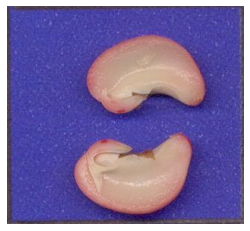

In [2]:
target = './embriaoteste.png'
input_image = cv.imread(target)
input_imagergb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(input_imagergb);

# Teste: Equalização padrão

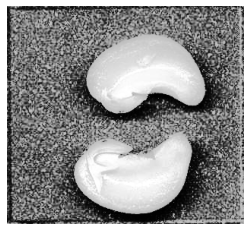

In [3]:
gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)
equalized = cv.equalizeHist(gray)
plt.axis("off")
plt.imshow(equalized, cmap = 'gray');

# Teste 1 CLAHE

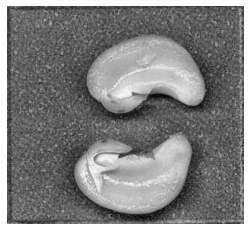

In [4]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalizedclahe = clahe.apply(gray)
plt.axis("off")
plt.imshow(equalizedclahe, cmap = 'gray');

# Teste 2 CLAHE: Diminuindo clipLimit

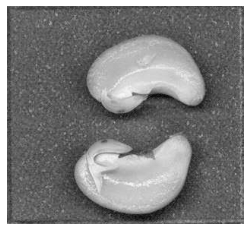

In [5]:
clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
equalizedclahe = clahe.apply(gray)
plt.axis("off")
plt.imshow(equalizedclahe, cmap = 'gray');

# Teste 3 CLAHE: Aumentando clipLimit, aumentando tiles MxN

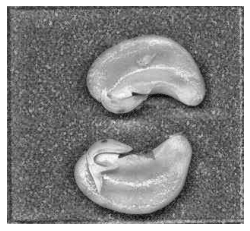

In [6]:
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))
equalizedclahe = clahe.apply(gray)
plt.axis("off")
plt.imshow(equalizedclahe, cmap = 'gray');

# Teste 4 CLAHE: Aumentando tiles MxN

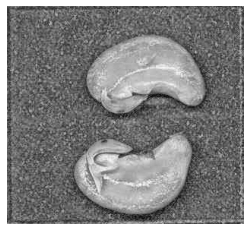

In [7]:
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(32, 32))
equalizedclahe = clahe.apply(gray)
plt.axis("off")
plt.imshow(equalizedclahe, cmap = 'gray');

# Teste 5 CLAHE: Diminuindo tiles MxN

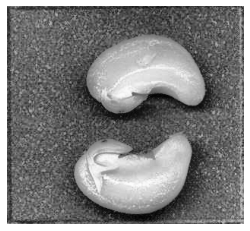

In [8]:
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(4, 4))
equalizedclahe = clahe.apply(gray)
plt.axis("off")
plt.imshow(equalizedclahe, cmap = 'gray');

# Aplicando algoritmo Kmeans para remoção de fundo

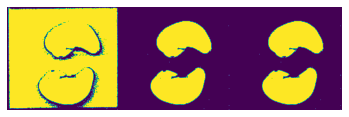

In [9]:
two_dimensional_image = input_image.reshape((-1, 3))
two_dimensional_image = np.float32(two_dimensional_image)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
clusters = 3
flags = cv.KMEANS_PP_CENTERS

result_image_compactness, result_image_labels, result_image_centers = cv.kmeans(two_dimensional_image, clusters, None, criteria, 10, flags)

result_image_centers = np.uint8(result_image_centers)
result_image = result_image_centers[result_image_labels.flatten()]
result_image = result_image.reshape((input_image.shape))

thresholded_blue_component, thresholded_green_component, thresholded_red_component = cv.split(result_image)

used_threshold, thresholded_bgr_image = cv.threshold(result_image, 130, 255, cv.THRESH_BINARY)
thresholded_blue_component, thresholded_green_component, thresholded_red_component = cv.split(thresholded_bgr_image)

plt.axis("off")
# plt.imshow(thresholded_blue_component);
plt.imshow(np.hstack([thresholded_blue_component, thresholded_green_component, thresholded_red_component]));

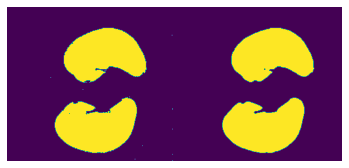

In [10]:
mask_kmeans = thresholded_red_component
mask_kmeans_filtered = cv.medianBlur(mask_kmeans, 5)

plt.axis("off")
# plt.imshow(mask_kmeans);
plt.imshow(np.hstack([mask_kmeans, mask_kmeans_filtered]));

# Fundo removido

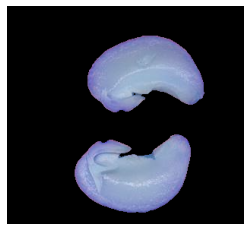

In [11]:
result_image = cv.bitwise_and(input_image, input_image, mask = mask_kmeans_filtered)

plt.axis("off")
plt.imshow(result_image);

In [12]:
# result_image = cv.cvtColor(result_image, cv.COLOR_BGR2GRAY)
# cinza_h = result_image.shape[0]
# cinza_w = result_image.shape[1]

# def gaussModif(gama_L, gama_H, c, D_0, imagem):
#    # Variáveis de interesse
#      im_h = imagem.shape[0]
#      im_w = imagem.shape[1]
#    # Coordenadas do centro
#      u_c = im_h/2
#      v_c = im_w/2
#      H = np.zeros(imagem.shape, dtype=’float’)
#    # Matriz de coordenadas
#      u, v = np.meshgrid(range(im_h), range(im_w), indexing=’ij’)
#    # Etapas de cálculo do filtro gaussiano modificado
#      D_uv_2 = (((u-u_c)**2 + (v-v_c)**2)**2).astype(‘float’)
#      div_D0 = D_uv_2/(D_0**2)
#      c_div_D0 = (-1)* c * div_D0
#      exp_div_D0 = np.exp(c_div_D0)
#      um_menos_exp = 1 — exp_div_D0
#      mult_delta_gama = (gama_H — gama_L) * um_menos_exp
#      H = gama_L + mult_delta_gama
#      return H

# Teste 1 CLAHE sem background

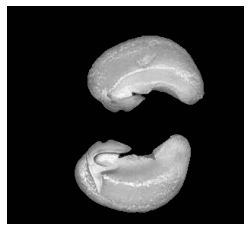

In [13]:
result_image = cv.cvtColor(result_image, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 2 CLAHE sem background: Diminuindo tiles MxN

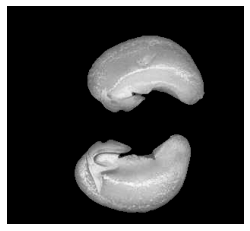

In [14]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 3 CLAHE sem background: Aumentando o clipLimit e tiles Linhas < Colunas

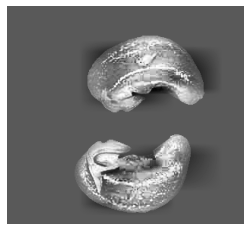

In [15]:
clahe = cv.createCLAHE(clipLimit=100.0, tileGridSize=(5, 40))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 4 CLAHE sem background: Aumentando o clipLimit e tiles Linhas < Colunas

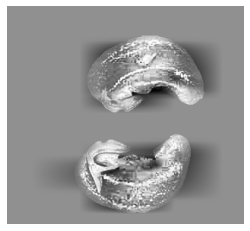

In [16]:
clahe = cv.createCLAHE(clipLimit=150.0, tileGridSize=(5, 50))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 5 CLAHE sem background: Aumentando o clipLimit e tiles Linhas < Colunas

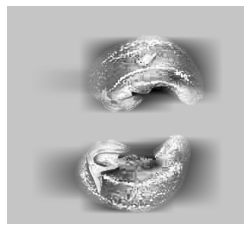

In [17]:
clahe = cv.createCLAHE(clipLimit=200.0, tileGridSize=(5, 50))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 6 CLAHE sem background: Diminuindo o clipLimit e tiles Linhas < Colunas

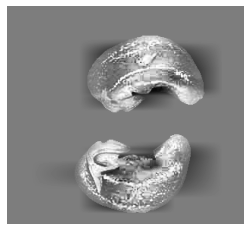

In [18]:
clahe = cv.createCLAHE(clipLimit=130.0, tileGridSize=(5, 70))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 7 CLAHE sem background: Diminuindo o clipLimit e tiles Linhas < Colunas 

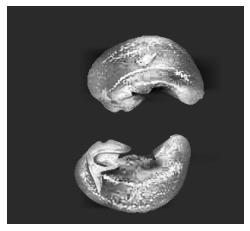

In [19]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(5, 70))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 8 CLAHE sem background: Tiles Linhas < Colunas

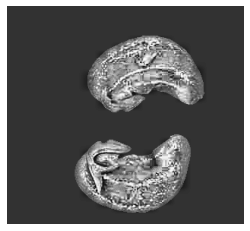

In [20]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(15, 70))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 9 CLAHE sem background: Tiles Linhas < Colunas

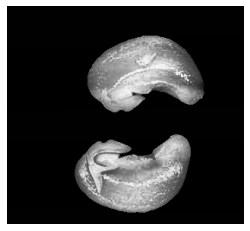

In [21]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(2, 70))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 10 CLAHE sem background: Tiles Linhas < Colunas

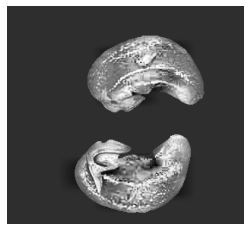

In [22]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(7, 70))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 11 CLAHE sem background: Tiles Linhas < Colunas

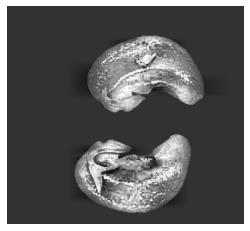

In [23]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(6, 125))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 12 CLAHE sem background: Tiles Linhas < Colunas

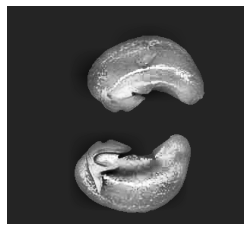

In [24]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(6, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 13 CLAHE sem background: Tiles Linhas < Colunas

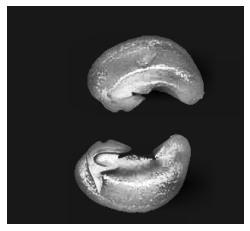

In [25]:
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(4, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 14 CLAHE sem background: Diminuindo clipLimit, tiles Linhas < Colunas

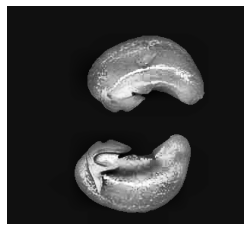

In [26]:
clahe = cv.createCLAHE(clipLimit=30.0, tileGridSize=(6, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 15 CLAHE sem background: Tiles Linhas > Colunas 

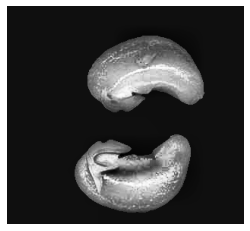

In [27]:
clahe = cv.createCLAHE(clipLimit=30.0, tileGridSize=(8, 6))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Teste 16 CLAHE sem background: Diminuindo clipLimit, tiles Linhas < Colunas 

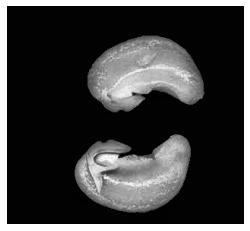

In [28]:
clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(6, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2, cmap = 'gray');

# Melhores parâmetros encontrados: clipLimit = 30; tileGridSize = 6x8

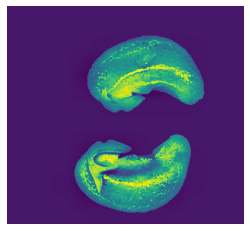

In [29]:
clahe = cv.createCLAHE(clipLimit=30.0, tileGridSize=(6, 8))
equalized2 = clahe.apply(result_image)
plt.axis("off")
plt.imshow(equalized2);